In [16]:
import tensorflow as tf
import keras
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import argparse
import cv2
import os
import matplotlib.pyplot as plt

In [17]:
model = tf.keras.models.load_model("./mask_recog_ver2.h5")
img = cv2.imread("./examples/example_02.png")[:,:,::-1]

In [18]:
face_cascade = cv2.CascadeClassifier('C:\Python\Python39\Lib\site-packages\cv2\data/haarcascade_frontalface_default.xml')

In [19]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray = np.array(gray, dtype='uint8')
faces = face_cascade.detectMultiScale(gray, 1.05, 10)

Image Width:  106
Text Width:  233


True

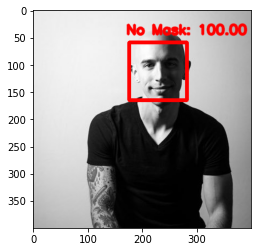

In [20]:
for (x, y, w, h) in faces:

    face = img[y:y+h, x:x+w]
    face = cv2.resize(face, (224, 224))
    face = img_to_array(face)
    face = preprocess_input(face)
    face = np.expand_dims(face, axis=0)
    (mask, withoutMask) = model.predict(face)[0]
    mask = mask*100
    withoutMask = withoutMask*100
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    # Getting Text Size in pixel
    print("Image Width: " , w)
    textSize = cv2.getTextSize(text="No Mask: " + str("%.2f" % round(mask, 2)), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, thickness=3)
    print("Text Width: " , textSize[0][0])
    
    if mask > withoutMask:
        img = np.array(img)
        cv2.putText(img,
                    text = "Mask: " + str("%.2f" % round(mask, 2)),
                    org = (x-5,y-15),
                    fontFace=font,
                    fontScale = (2*w)/textSize[0][0],
                    color = (0, 255, 0),
                    thickness = 3,
                    lineType = cv2.LINE_AA)
        cv2.rectangle(img, (x, y), (x+w, y+h), (0,255,0), 5)
    else:
        img = np.array(img)
        cv2.putText(img,
                    text = "No Mask: " + str("%.2f" % round(withoutMask, 2)),
                    org = (x-5,y-15),
                    fontFace=font,
                    fontScale = (1.8*w)/textSize[0][0],
                    color = (255, 0, 0),
                    thickness = 3,
                    lineType = cv2.LINE_AA)
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 5)

# Display
plt.imshow(img)
cv2.imwrite("image1.jpeg",img)